In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from sklearn.ensemble import IsolationForest

#show all columns
pd.set_option('display.max_columns',200)

In [2]:
data=pd.read_csv("bank_transactions_data_2.csv")

In [3]:
data.head()

TransactionID AccountID  TransactionAmount   TransactionDate  \
0      TX000001   AC00128              14.09   11/4/2023 16:29   
1      TX000002   AC00455             376.24  27/06/2023 16:44   
2      TX000003   AC00019             126.29   10/7/2023 18:16   
3      TX000004   AC00070             184.50    5/5/2023 16:32   
4      TX000005   AC00411              13.45  16/10/2023 17:51   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21          4/11/2024 8:08  
1        13758.91          4/11/2024 8:09  
2         1122.35          4/11/2024 8:07  
3         8569.06          4/11/2024 8:09  
4         7429.40          4/11/2024 8:06

In [4]:
data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [5]:
data.describe()

TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2512.000000  2512.000000          2512.000000    2512.000000   
mean          297.593778    44.673965           119.643312       1.124602   
std           291.946243    17.792198            69.963757       0.602662   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.885000    27.000000            63.000000       1.000000   
50%           211.140000    45.000000           112.500000       1.000000   
75%           414.527500    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2512.000000  
mean      5114.302966  
std       3900.942499  
min        101.250000  
25%       1504.370000  
50%       4735.510000  
75%       7678.820000  
max      14977.990000

In [6]:
data.dtypes

TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object

In [7]:
data.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(0)

In [9]:
# Convert Data Types
#data["TransactionID"] = data["TransactionID"].astype("string")
#data["AccountID"] = data["AccountID"].astype("string")
data["TransactionDate"] = pd.to_datetime(data["TransactionDate"], format='mixed')
#data["TransactionType"] = data["TransactionType"].astype("category")
#data["Location"] = data["Location"].astype("category")
#data["DeviceID"] = data["DeviceID"].astype("string")
#data["IP Address"] = data["IP Address"].astype("string")
#data["MerchantID"] = data["MerchantID"].astype("string")
#data["Channel"] = data["Channel"].astype("category")
#data["CustomerOccupation"] = data["CustomerOccupation"].astype("category")
#data["TransactionDuration"] = data["TransactionDuration"].astype("float32")
data["PreviousTransactionDate"] = pd.to_datetime(data["PreviousTransactionDate"], format='mixed')

In [10]:
data.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

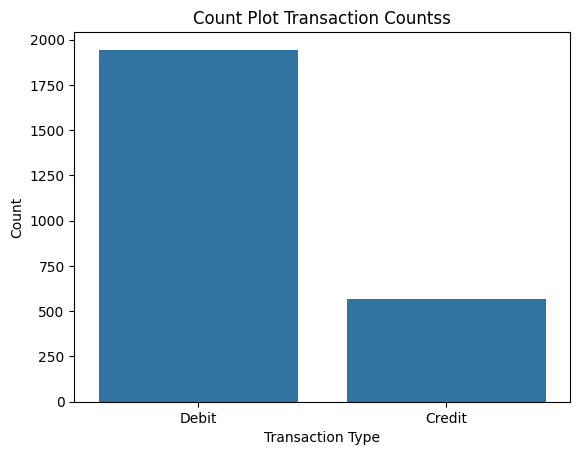

In [11]:
sns.countplot(x='TransactionType',
             data=data)
plt.title('Count Plot Transaction Countss')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

In [12]:
data['TransactionType'].unique()

array(['Debit', 'Credit'], dtype=object)

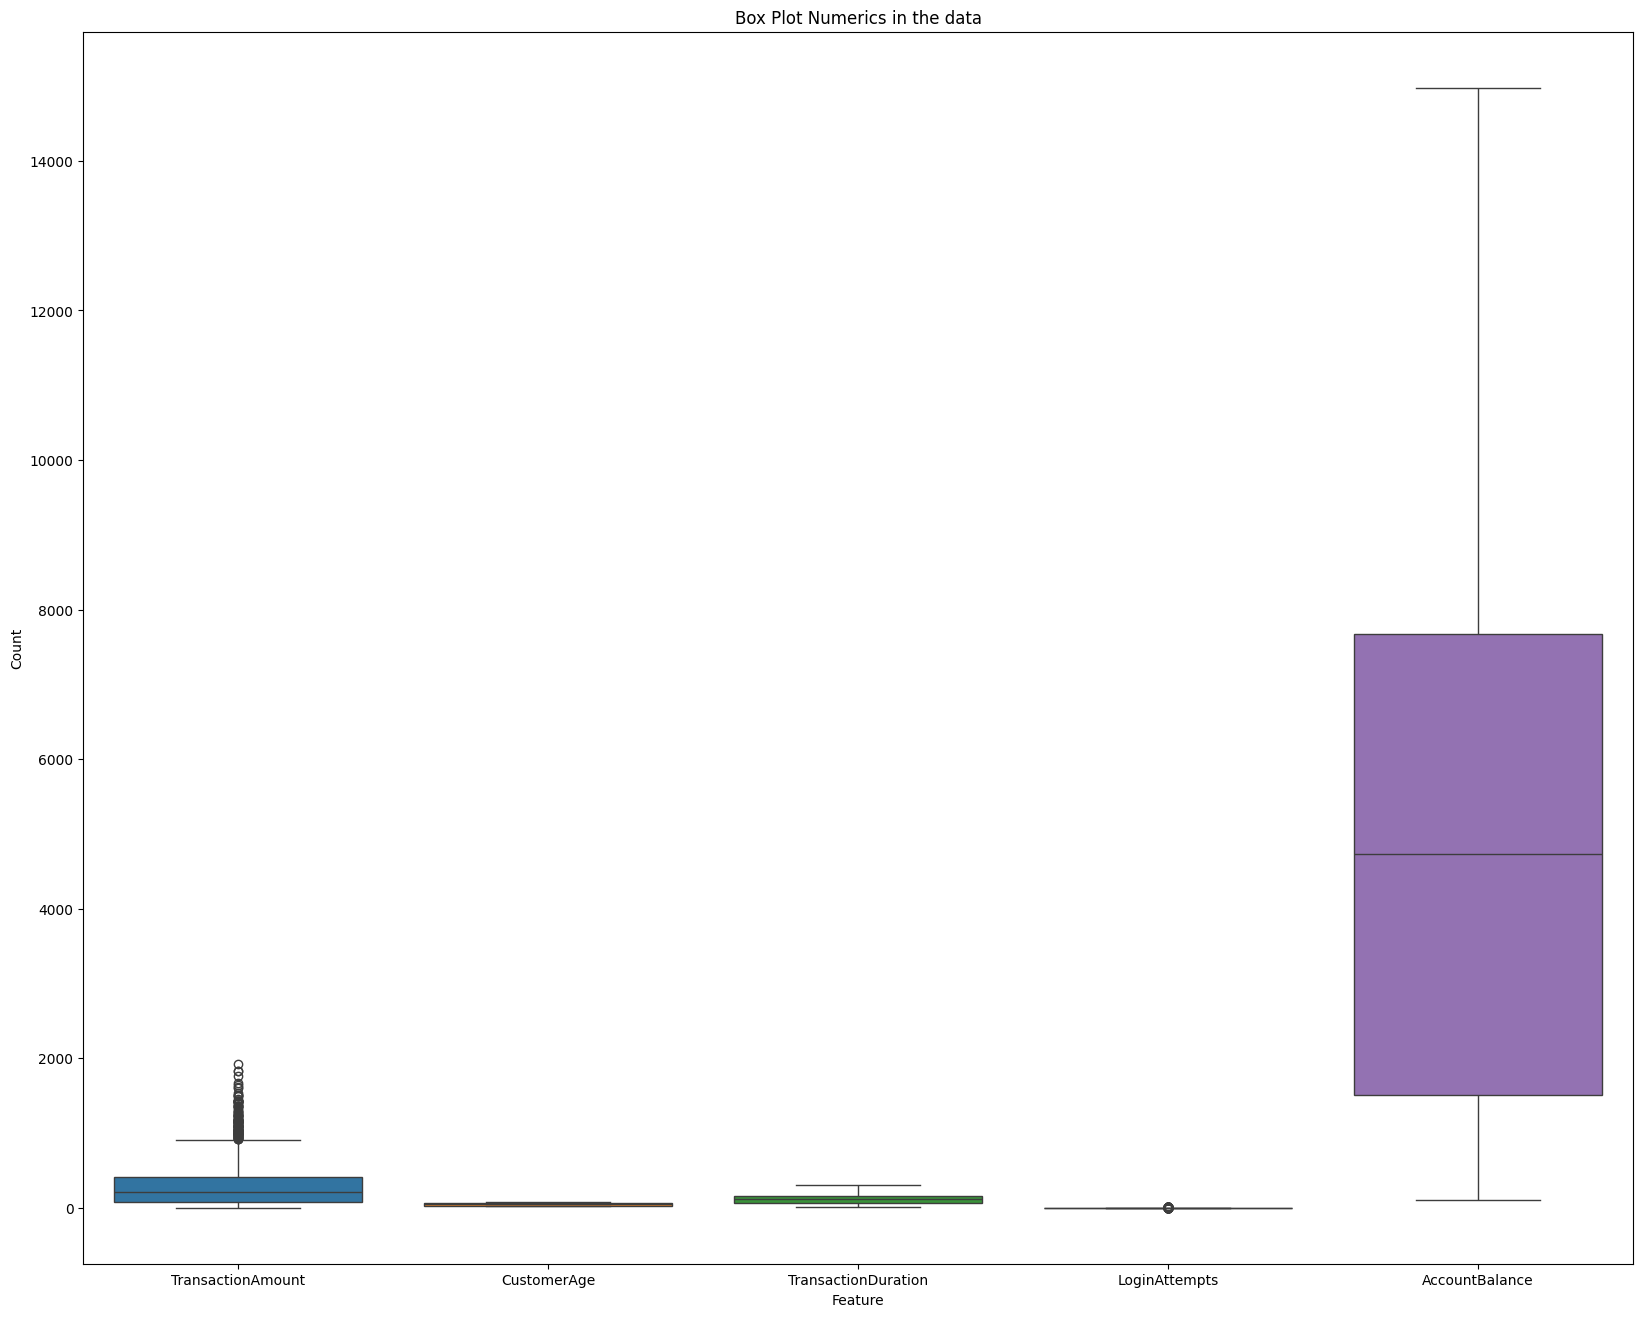

In [13]:
plt.figure(figsize=(20,16))
sns.boxplot(data)
plt.title('Box Plot Numerics in the data')
plt.xlabel('Feature')
plt.ylabel('Count')
plt.show()

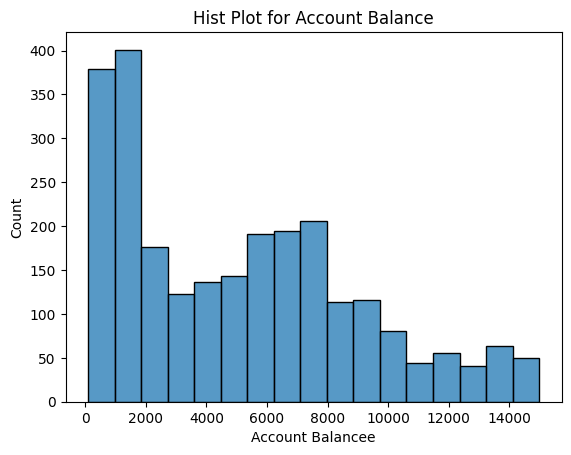

In [14]:
sns.histplot(x='AccountBalance',
            data=data)
plt.title('Hist Plot for Account Balance')
plt.xlabel('Account Balancee')
plt.ylabel('Count')
plt.show()

C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\128869580.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel',


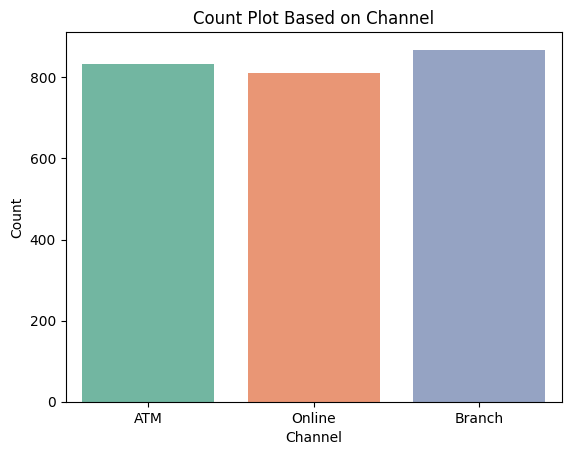

In [15]:
sns.countplot(x='Channel',
              palette='Set2',
              data=data)
plt.title('Count Plot Based on Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

In [16]:
data

TransactionID AccountID  TransactionAmount     TransactionDate  \
0         TX000001   AC00128              14.09 2023-11-04 16:29:00   
1         TX000002   AC00455             376.24 2023-06-27 16:44:00   
2         TX000003   AC00019             126.29 2023-10-07 18:16:00   
3         TX000004   AC00070             184.50 2023-05-05 16:32:00   
4         TX000005   AC00411              13.45 2023-10-16 17:51:00   
...            ...       ...                ...                 ...   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:00   
2508      TX002509   AC00322             251.54 2023-03-22 17:36:00   
2509      TX002510   AC00095              28.63 2023-08-21 17:08:00   
2510      TX002511   AC00118             185.97 2023-02-24 16:24:00   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:00   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92       M015   
1              Debit           Houston  D000051     13.149.61.4       M052   
2              Debit              Mesa  D000235  215.97.143.157       M009   
3              Debit           Raleigh  D000187  200.13.225.150       M002   
4             Credit           Atlanta  D000308    65.164.3.100       M091   
...              ...               ...      ...             ...        ...   
2507          Credit  Colorado Springs  D000625    21.157.41.17       M072   
2508           Debit            Tucson  D000410  49.174.157.140       M029   
2509           Debit         San Diego  D000095     58.1.27.124       M087   
2510           Debit            Denver  D000634   21.190.11.223       M041   
2511          Credit      Jacksonville  D000215   59.127.135.25       M041   

     Channel  CustomerAge CustomerOccupation  TransactionDuration  \
0        ATM           70             Doctor                   81   
1        ATM           68             Doctor                  141   
2     Online           19            Student                   56   
3     Online           26            Student                   25   
4     Online           26            Student                  198   
...      ...          ...                ...                  ...   
2507  Branch           33             Doctor                  109   
2508  Branch           48             Doctor                  177   
2509  Branch           56            Retired                  146   
2510  Online           23            Student                   19   
2511  Online           24            Student                   93   

      LoginAttempts  AccountBalance PreviousTransactionDate  
0                 1         5112.21     2024-04-11 08:08:00  
1                 1        13758.91     2024-04-11 08:09:00  
2                 1         1122.35     2024-04-11 08:07:00  
3                 1         8569.06     2024-04-11 08:09:00  
4                 1         7429.40     2024-04-11 08:06:00  
...             ...             ...                     ...  
2507              1        12690.79     2024-04-11 08:11:00  
2508              1          254.75     2024-04-11 08:11:00  
2509              1         3382.91     2024-04-11 08:08:00  
2510              1         1776.91     2024-04-11 08:12:00  
2511              1          131.25     2024-04-11 08:07:00  

[2512 rows x 16 columns]

C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\1316359279.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerOccupation',


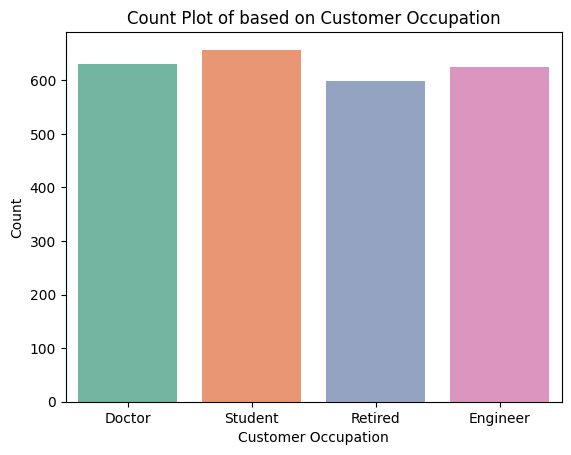

In [17]:
sns.countplot(x='CustomerOccupation',
              palette='Set2',
             data=data)
plt.title('Count Plot of based on Customer Occupation')
plt.xlabel('Customer Occupation')
plt.ylabel('Count')
plt.show()

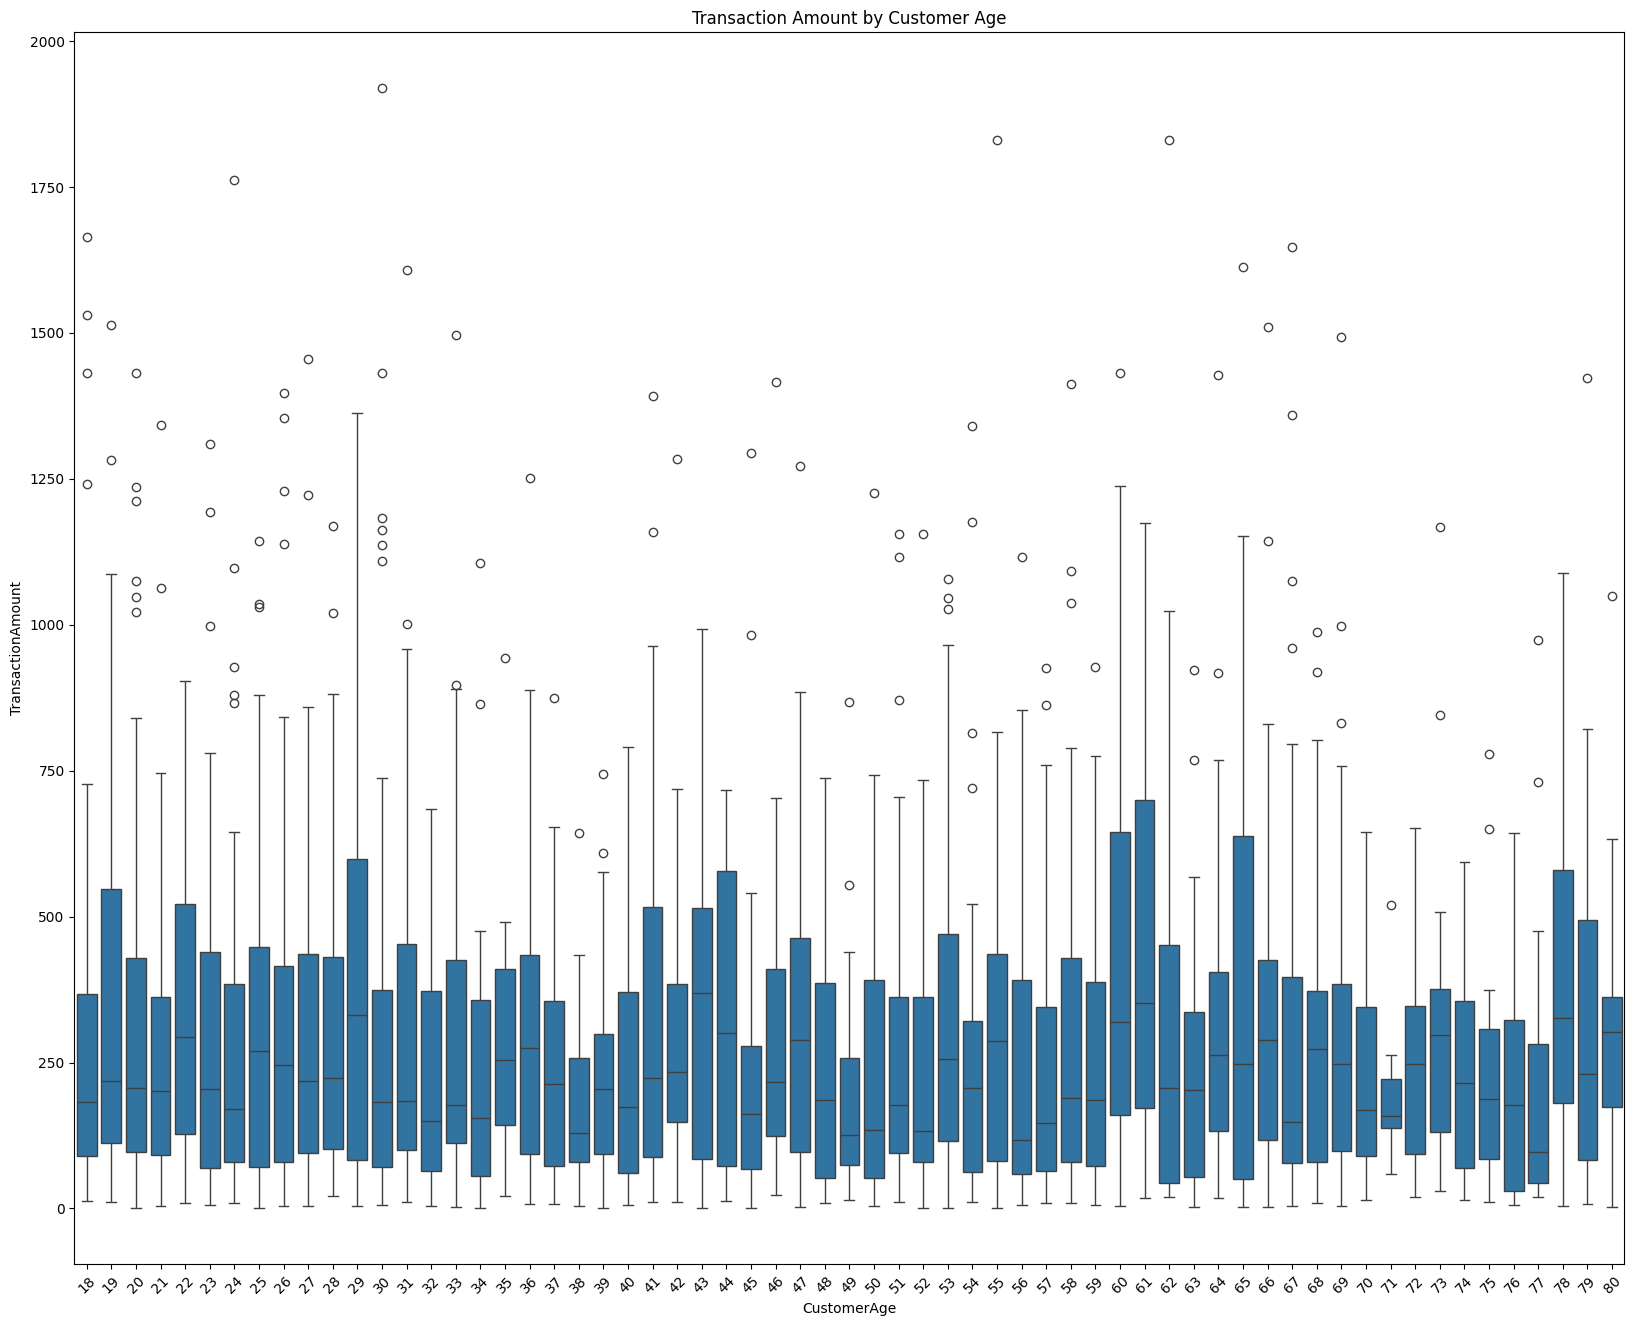

In [18]:
plt.figure(figsize=(20, 16))
sns.boxplot(x="CustomerAge", 
            y="TransactionAmount", 
            data=data)
plt.title("Transaction Amount by Customer Age")
plt.xticks(rotation=45)
plt.show()

C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\3591918662.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, y="Location",


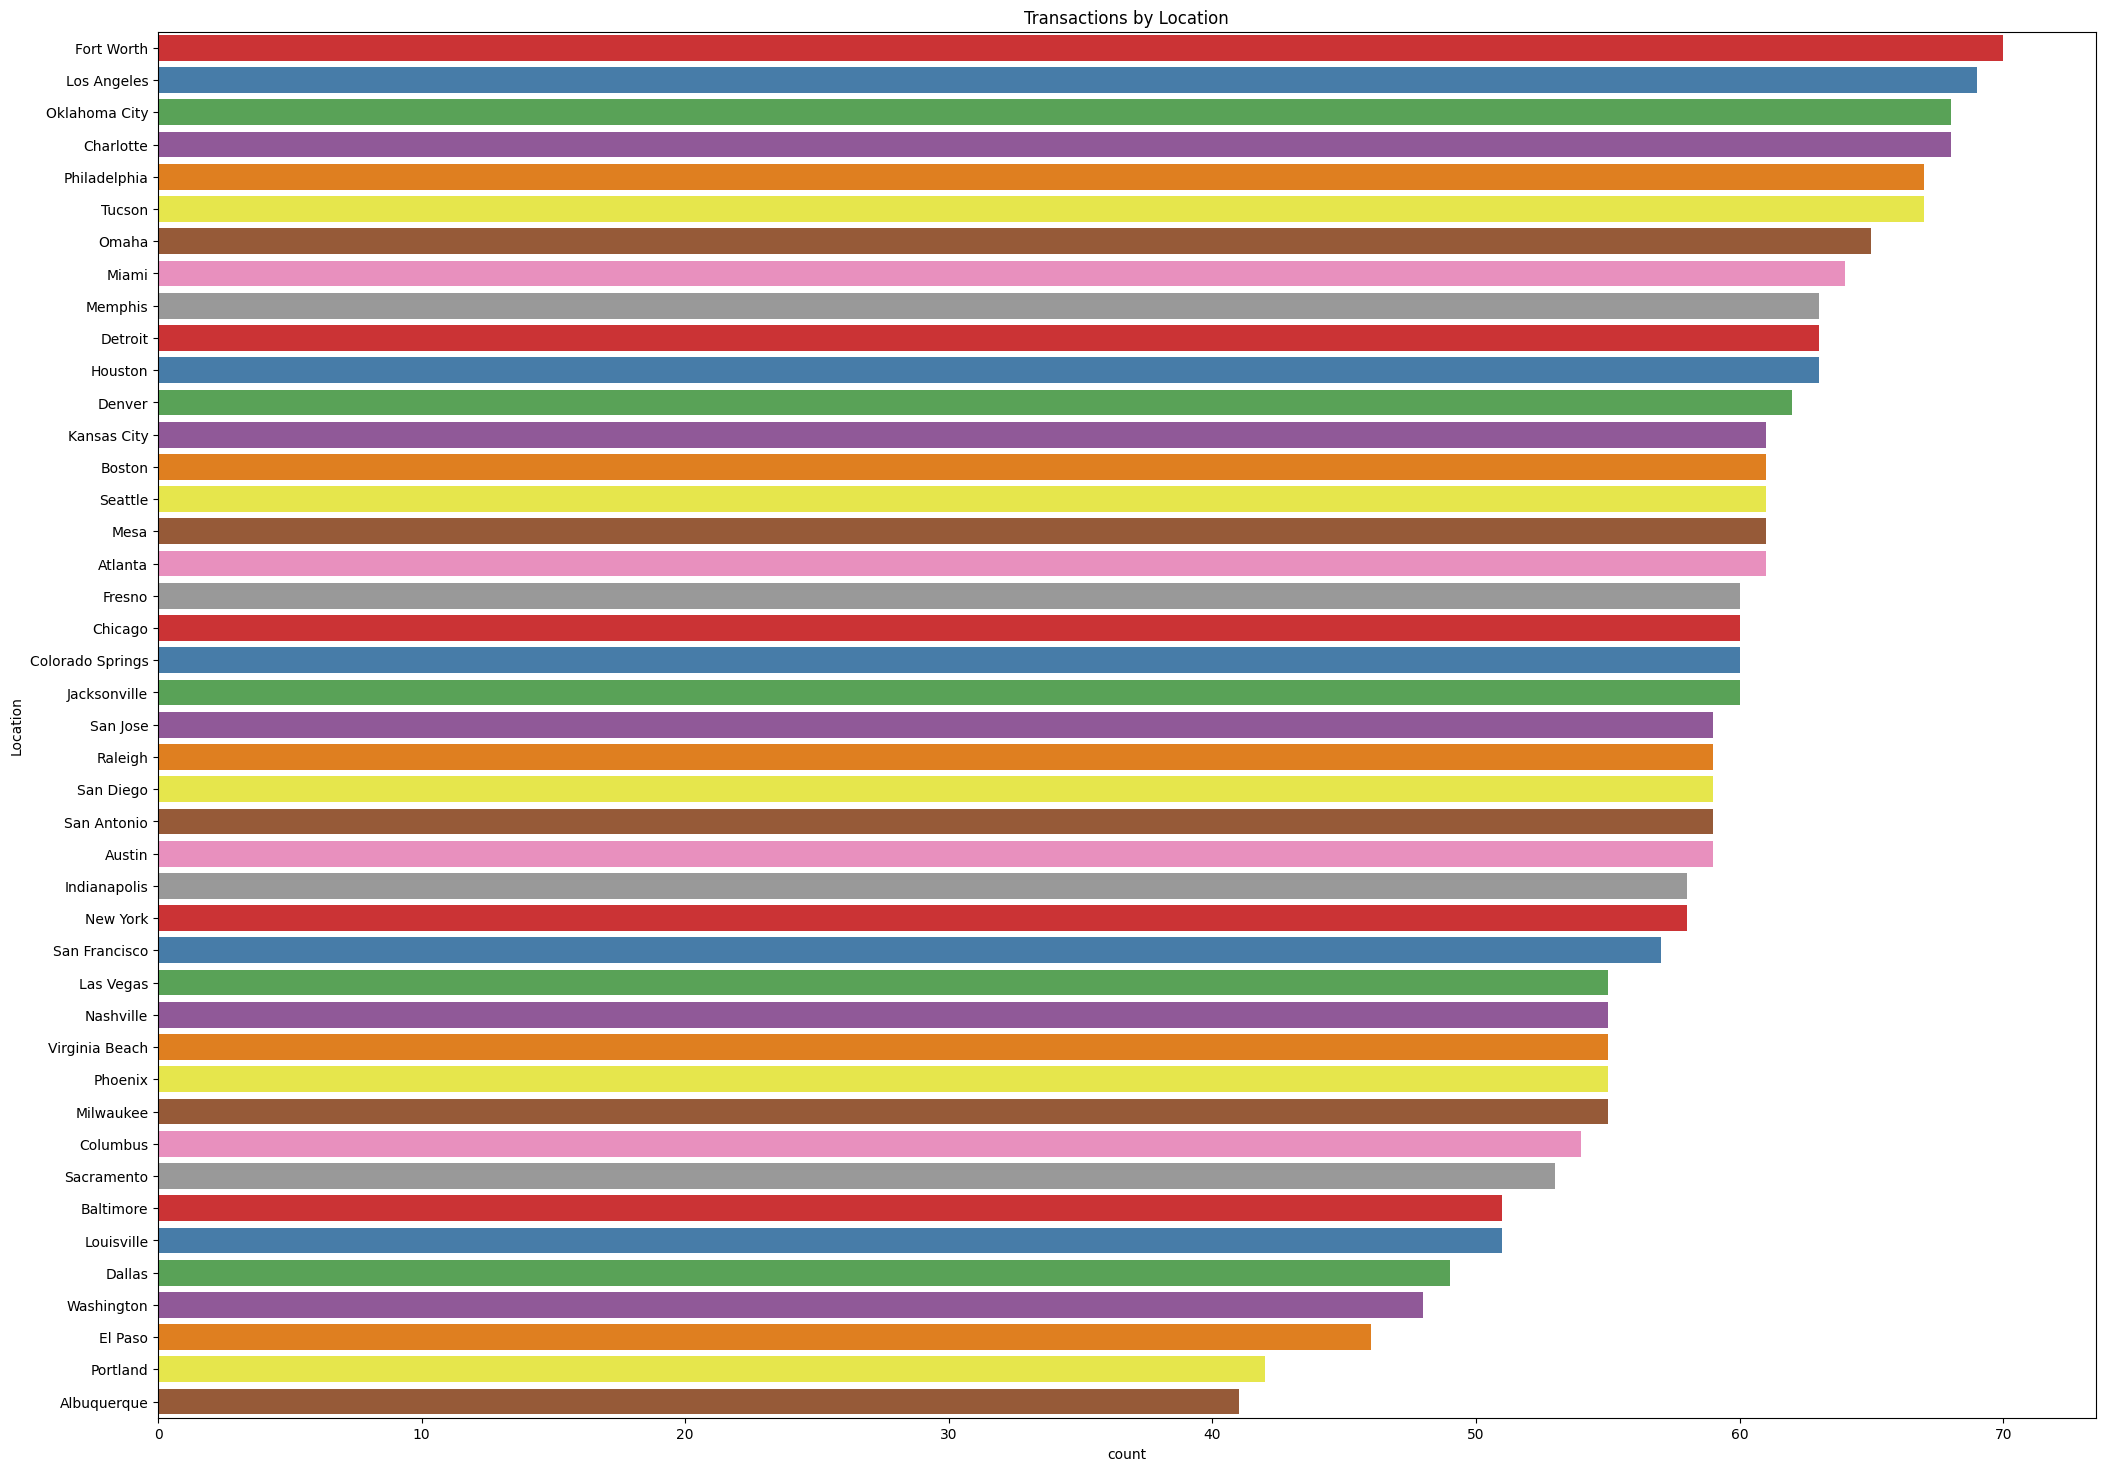

In [19]:
plt.figure(figsize=(25, 18))
sns.countplot(data=data, y="Location", 
              order=data["Location"].value_counts().index, 
              palette="Set1")
plt.title("Transactions by Location")
plt.show()

In [20]:
data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [21]:
#PCA FOR DIMENSINALITY

In [22]:
data.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-11-04 16:29:00   
1      TX000002   AC00455             376.24 2023-06-27 16:44:00   
2      TX000003   AC00019             126.29 2023-10-07 18:16:00   
3      TX000004   AC00070             184.50 2023-05-05 16:32:00   
4      TX000005   AC00411              13.45 2023-10-16 17:51:00   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-04-11 08:08:00  
1        13758.91     2024-04-11 08:09:00  
2         1122.35     2024-04-11 08:07:00  
3         8569.06     2024-04-11 08:09:00  
4         7429.40     2024-04-11 08:06:00

In [23]:
data.dtypes

TransactionID                      object
AccountID                          object
TransactionAmount                 float64
TransactionDate            datetime64[ns]
TransactionType                    object
Location                           object
DeviceID                           object
IP Address                         object
MerchantID                         object
Channel                            object
CustomerAge                         int64
CustomerOccupation                 object
TransactionDuration                 int64
LoginAttempts                       int64
AccountBalance                    float64
PreviousTransactionDate    datetime64[ns]
dtype: object

In [24]:
data.columns

Index(['TransactionID', 'AccountID', 'TransactionAmount', 'TransactionDate',
       'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID',
       'Channel', 'CustomerAge', 'CustomerOccupation', 'TransactionDuration',
       'LoginAttempts', 'AccountBalance', 'PreviousTransactionDate'],
      dtype='object')

In [25]:
data.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-11-04 16:29:00   
1      TX000002   AC00455             376.24 2023-06-27 16:44:00   
2      TX000003   AC00019             126.29 2023-10-07 18:16:00   
3      TX000004   AC00070             184.50 2023-05-05 16:32:00   
4      TX000005   AC00411              13.45 2023-10-16 17:51:00   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate  
0         5112.21     2024-04-11 08:08:00  
1        13758.91     2024-04-11 08:09:00  
2         1122.35     2024-04-11 08:07:00  
3         8569.06     2024-04-11 08:09:00  
4         7429.40     2024-04-11 08:06:00

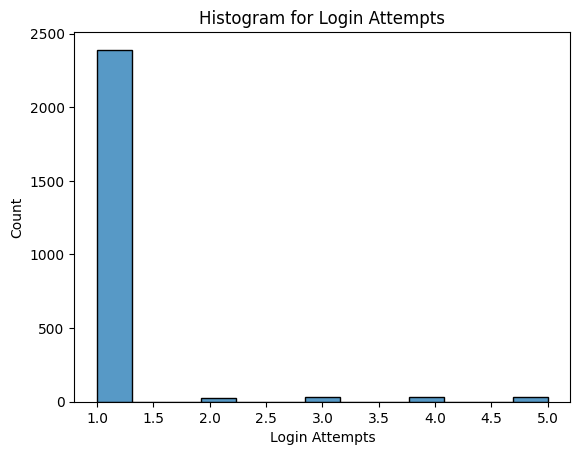

In [26]:
sns.histplot(x='LoginAttempts',
            data=data)
plt.title('Histogram for Login Attempts')
plt.xlabel('Login Attempts')
plt.ylabel('Count')
plt.show()

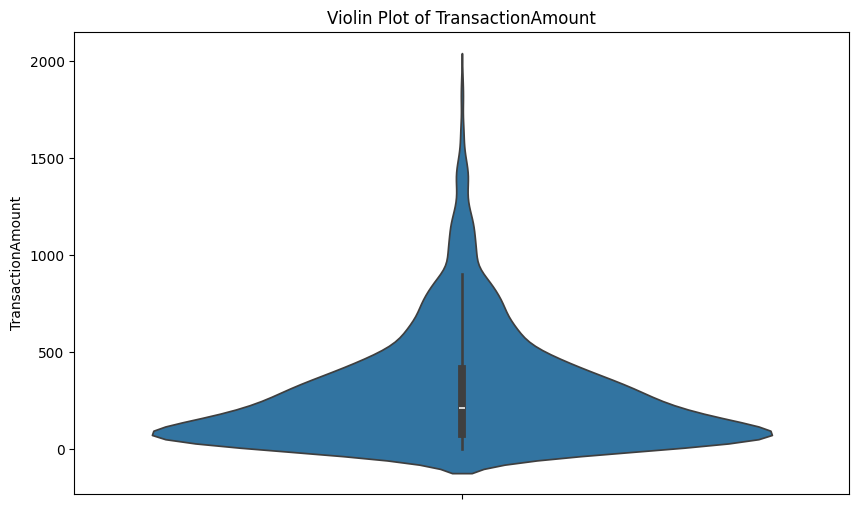

In [27]:
#violin for trasaction amounts
plt.figure(figsize=(10,6))
sns.violinplot(y='TransactionAmount', data=data)

plt.title('Violin Plot of TransactionAmount')

plt.ylabel('TransactionAmount')

plt.show()

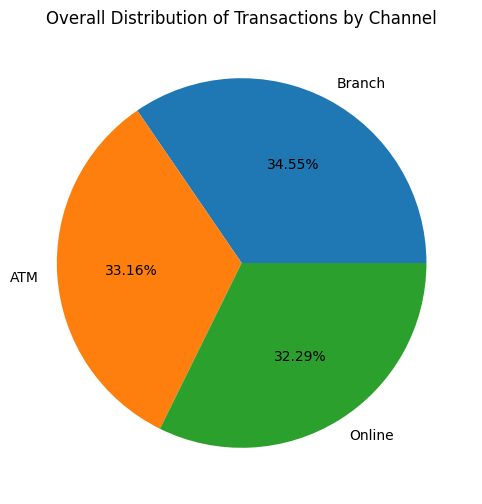

In [28]:
plt.figure(figsize=(10, 6))

branch_counts = data[data['Channel']=='Branch']['Channel'].count()
atm_counts = data[data['Channel']=='ATM']['Channel'].count()
online_counts = data[data['Channel']=='Online']['Channel'].count()

index_values = [branch_counts, atm_counts, online_counts]
index_labels = ['Branch', 'ATM', 'Online']

plt.pie(index_values, labels = index_labels, autopct='%2.2f%%')

plt.title('Overall Distribution of Transactions by Channel')

plt.show()

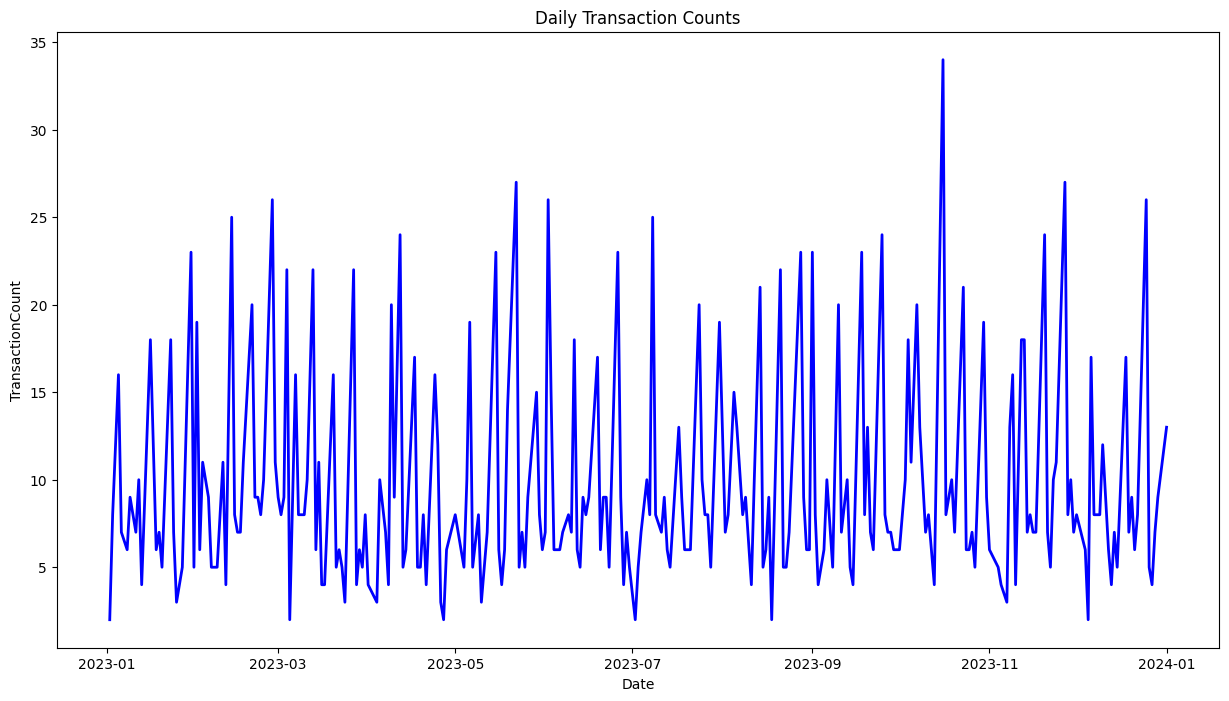

In [29]:
data['TransactionDay'] = data['TransactionDate'].dt.date
daily_counts = data.groupby('TransactionDay').size() #count gives count of each column in the dataframe
plt.figure(figsize=(15,8))

daily_counts.plot(title='Daily Transaction Counts', 
                  color='blue', 
                  linewidth=2)
plt.xlabel('Date')
plt.ylabel('TransactionCount')
plt.show()

In [30]:
data.head()

TransactionID AccountID  TransactionAmount     TransactionDate  \
0      TX000001   AC00128              14.09 2023-11-04 16:29:00   
1      TX000002   AC00455             376.24 2023-06-27 16:44:00   
2      TX000003   AC00019             126.29 2023-10-07 18:16:00   
3      TX000004   AC00070             184.50 2023-05-05 16:32:00   
4      TX000005   AC00411              13.45 2023-10-16 17:51:00   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81              1   
1           68             Doctor                  141              1   
2           19            Student                   56              1   
3           26            Student                   25              1   
4           26            Student                  198              1   

   AccountBalance PreviousTransactionDate TransactionDay  
0         5112.21     2024-04-11 08:08:00     2023-11-04  
1        13758.91     2024-04-11 08:09:00     2023-06-27  
2         1122.35     2024-04-11 08:07:00     2023-10-07  
3         8569.06     2024-04-11 08:09:00     2023-05-05  
4         7429.40     2024-04-11 08:06:00     2023-10-16

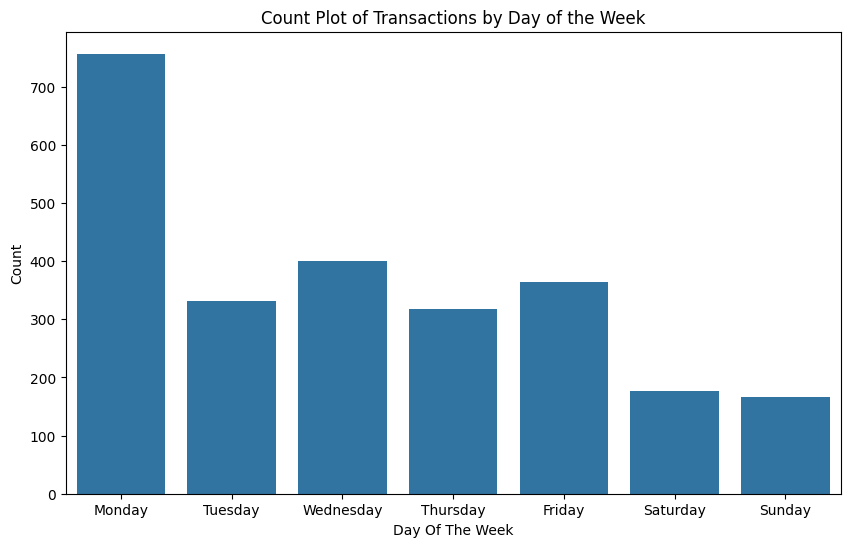

In [31]:
data['DayOfWeek'] = data['TransactionDate'].dt.day_name()
plt.figure(figsize=(10,6))
sns.countplot(data=data, 
              x='DayOfWeek', 
              order=['Monday', 'Tuesday', 
                     'Wednesday', 'Thursday', 
                     'Friday', 'Saturday', 'Sunday'])
plt.title('Count Plot of Transactions by Day of the Week')
plt.xlabel('Day Of The Week')
plt.ylabel('Count')
plt.show()

C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\2960125514.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=data, x='Hour',


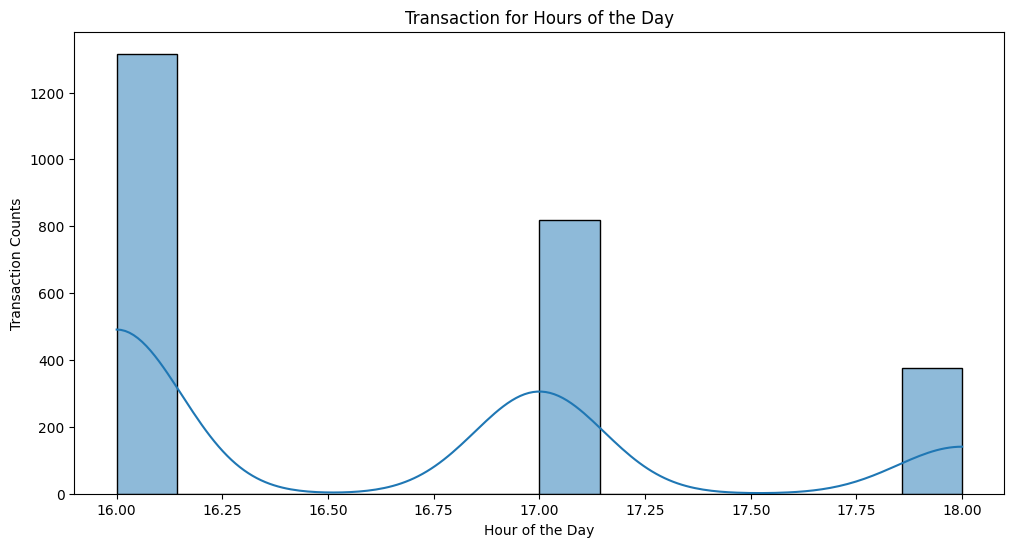

In [32]:
data['Hour'] = data['TransactionDate'].dt.hour
plt.figure(figsize=(12,6))
sns.histplot(data=data, x='Hour', 
             kde=True, 
             palette='plasma')
plt.title('Transaction for Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Counts')
plt.show()

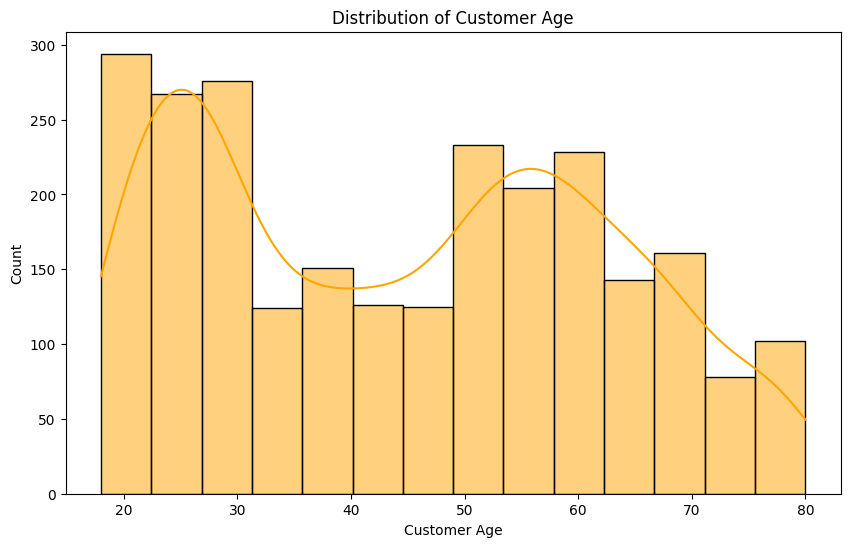

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(data = data, x=data['CustomerAge'], 
             kde=True, 
             color='orange')
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Count')
plt.show()

In [34]:
#data.drop(data['IP Address', 'MerchantID', 'T, ransactionID', 'DeviceID'], axis=1, inplace=True)  
data1=data[['CustomerAge','CustomerOccupation', 'TransactionAmount', 'Location', 
            'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate', 'DayOfWeek', 'Hour', 
            'TransactionType','Channel','TransactionDuration','LoginAttempts','AccountBalance']]

In [35]:
#ENCODE DATA
encoder = LabelEncoder()
data1['CustomerOccupation'] = encoder.fit_transform(data1['CustomerOccupation'])
data1['TransactionType'] = encoder.fit_transform(data1['TransactionType'])
data1['Channel'] = encoder.fit_transform(data1['Channel'])
data1['Location'] = encoder.fit_transform(data1['Location'])
data1['DeviceID'] = encoder.fit_transform(data1['DeviceID'])
data1['IP Address'] = encoder.fit_transform(data1['IP Address'])
data1['MerchantID'] = encoder.fit_transform(data1['MerchantID'])
data1['PreviousTransactionDate'] = encoder.fit_transform(data1['PreviousTransactionDate'])

day_mapping = {
    "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, 
    "Friday": 5, "Saturday": 6, "Sunday": 7
}

data1['DayOfWeek'] = data1['DayOfWeek'].map(day_mapping)

C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\3585628011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['CustomerOccupation'] = encoder.fit_transform(data1['CustomerOccupation'])
C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\3585628011.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['TransactionType'] = encoder.fit_transform(data1['TransactionType'])
C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\3585628011.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy 

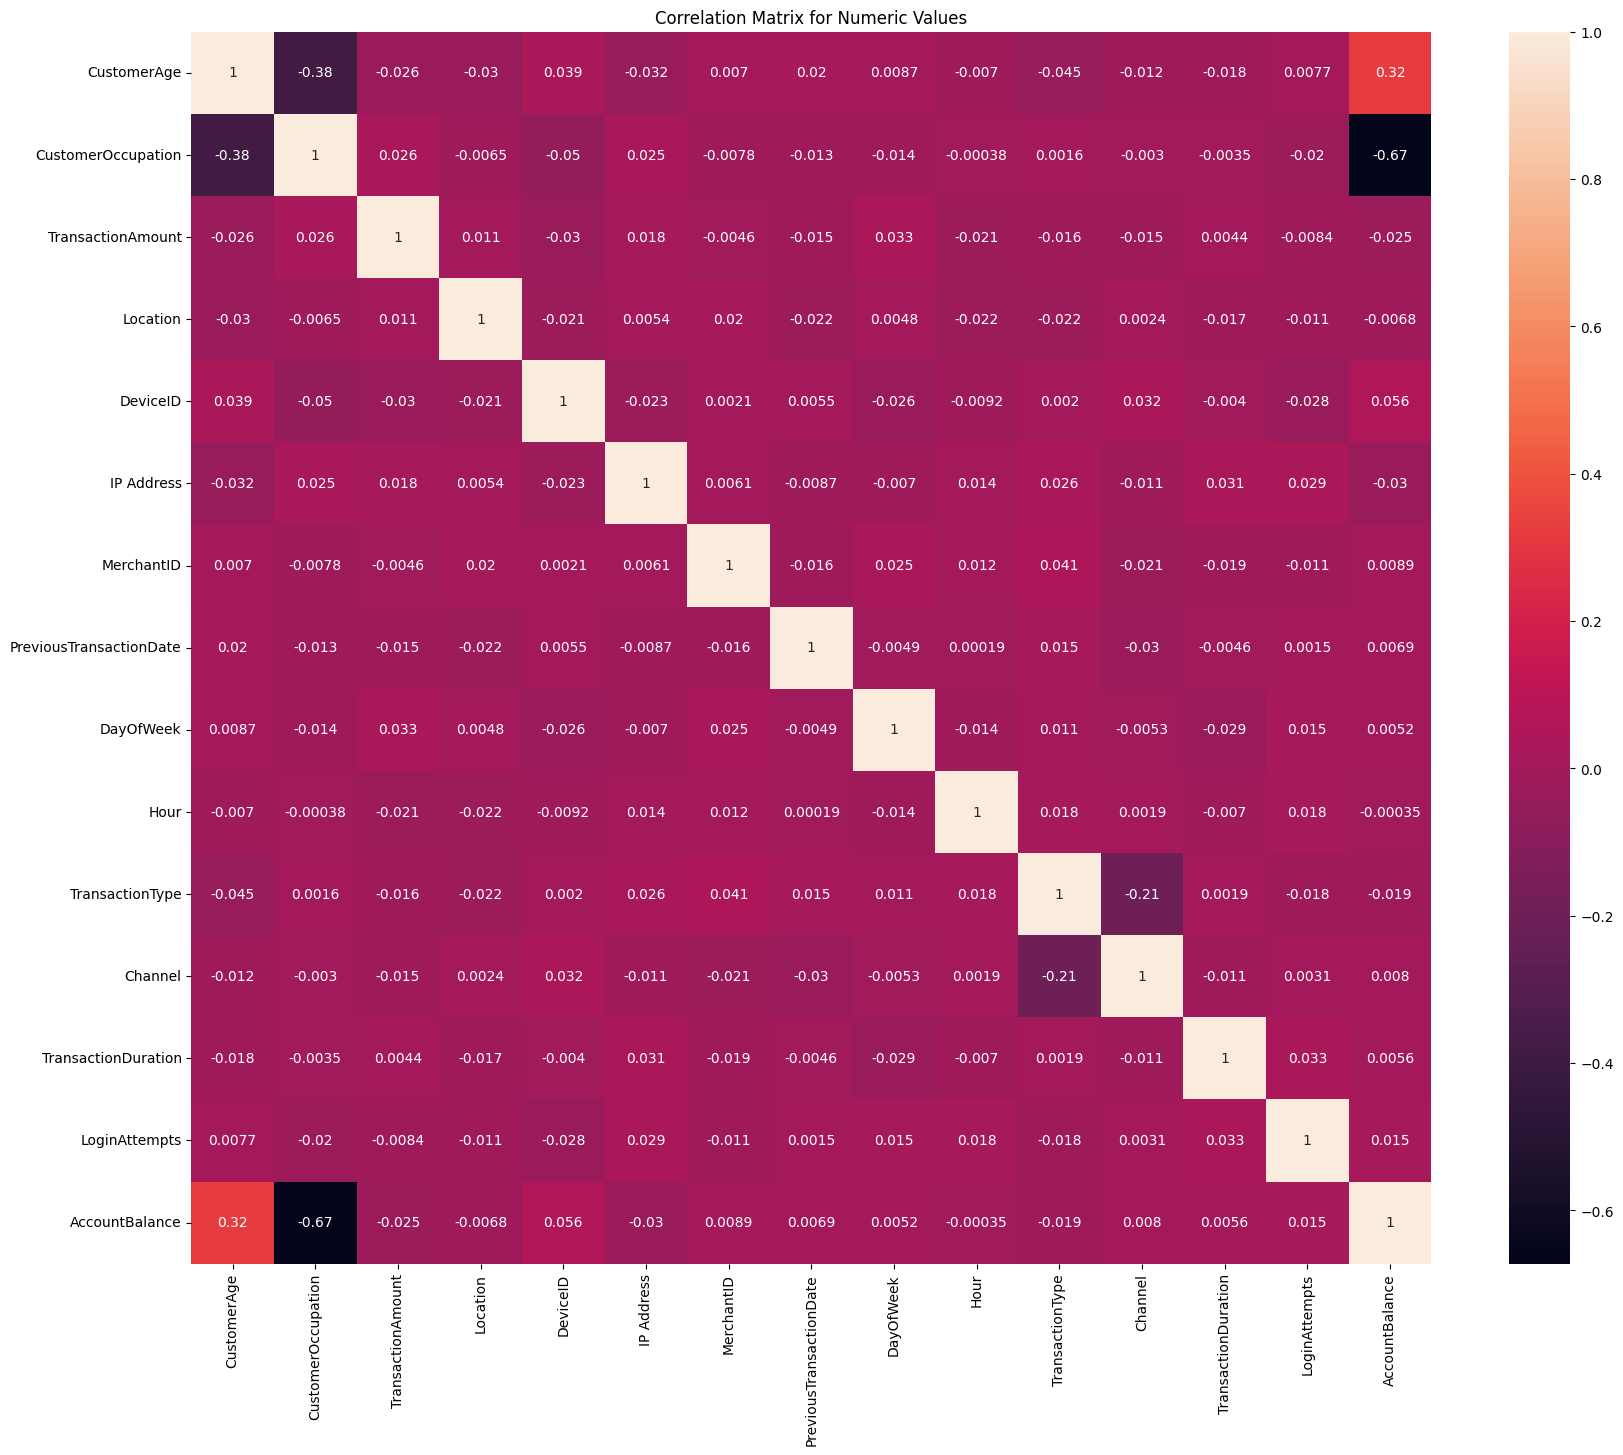

In [36]:
plt.figure(figsize=(20,16))
sns.heatmap(data1.corr(),
           annot=True)
plt.title('Correlation Matrix for Numeric Values')
plt.show()

<Figure size 2000x1600 with 0 Axes>

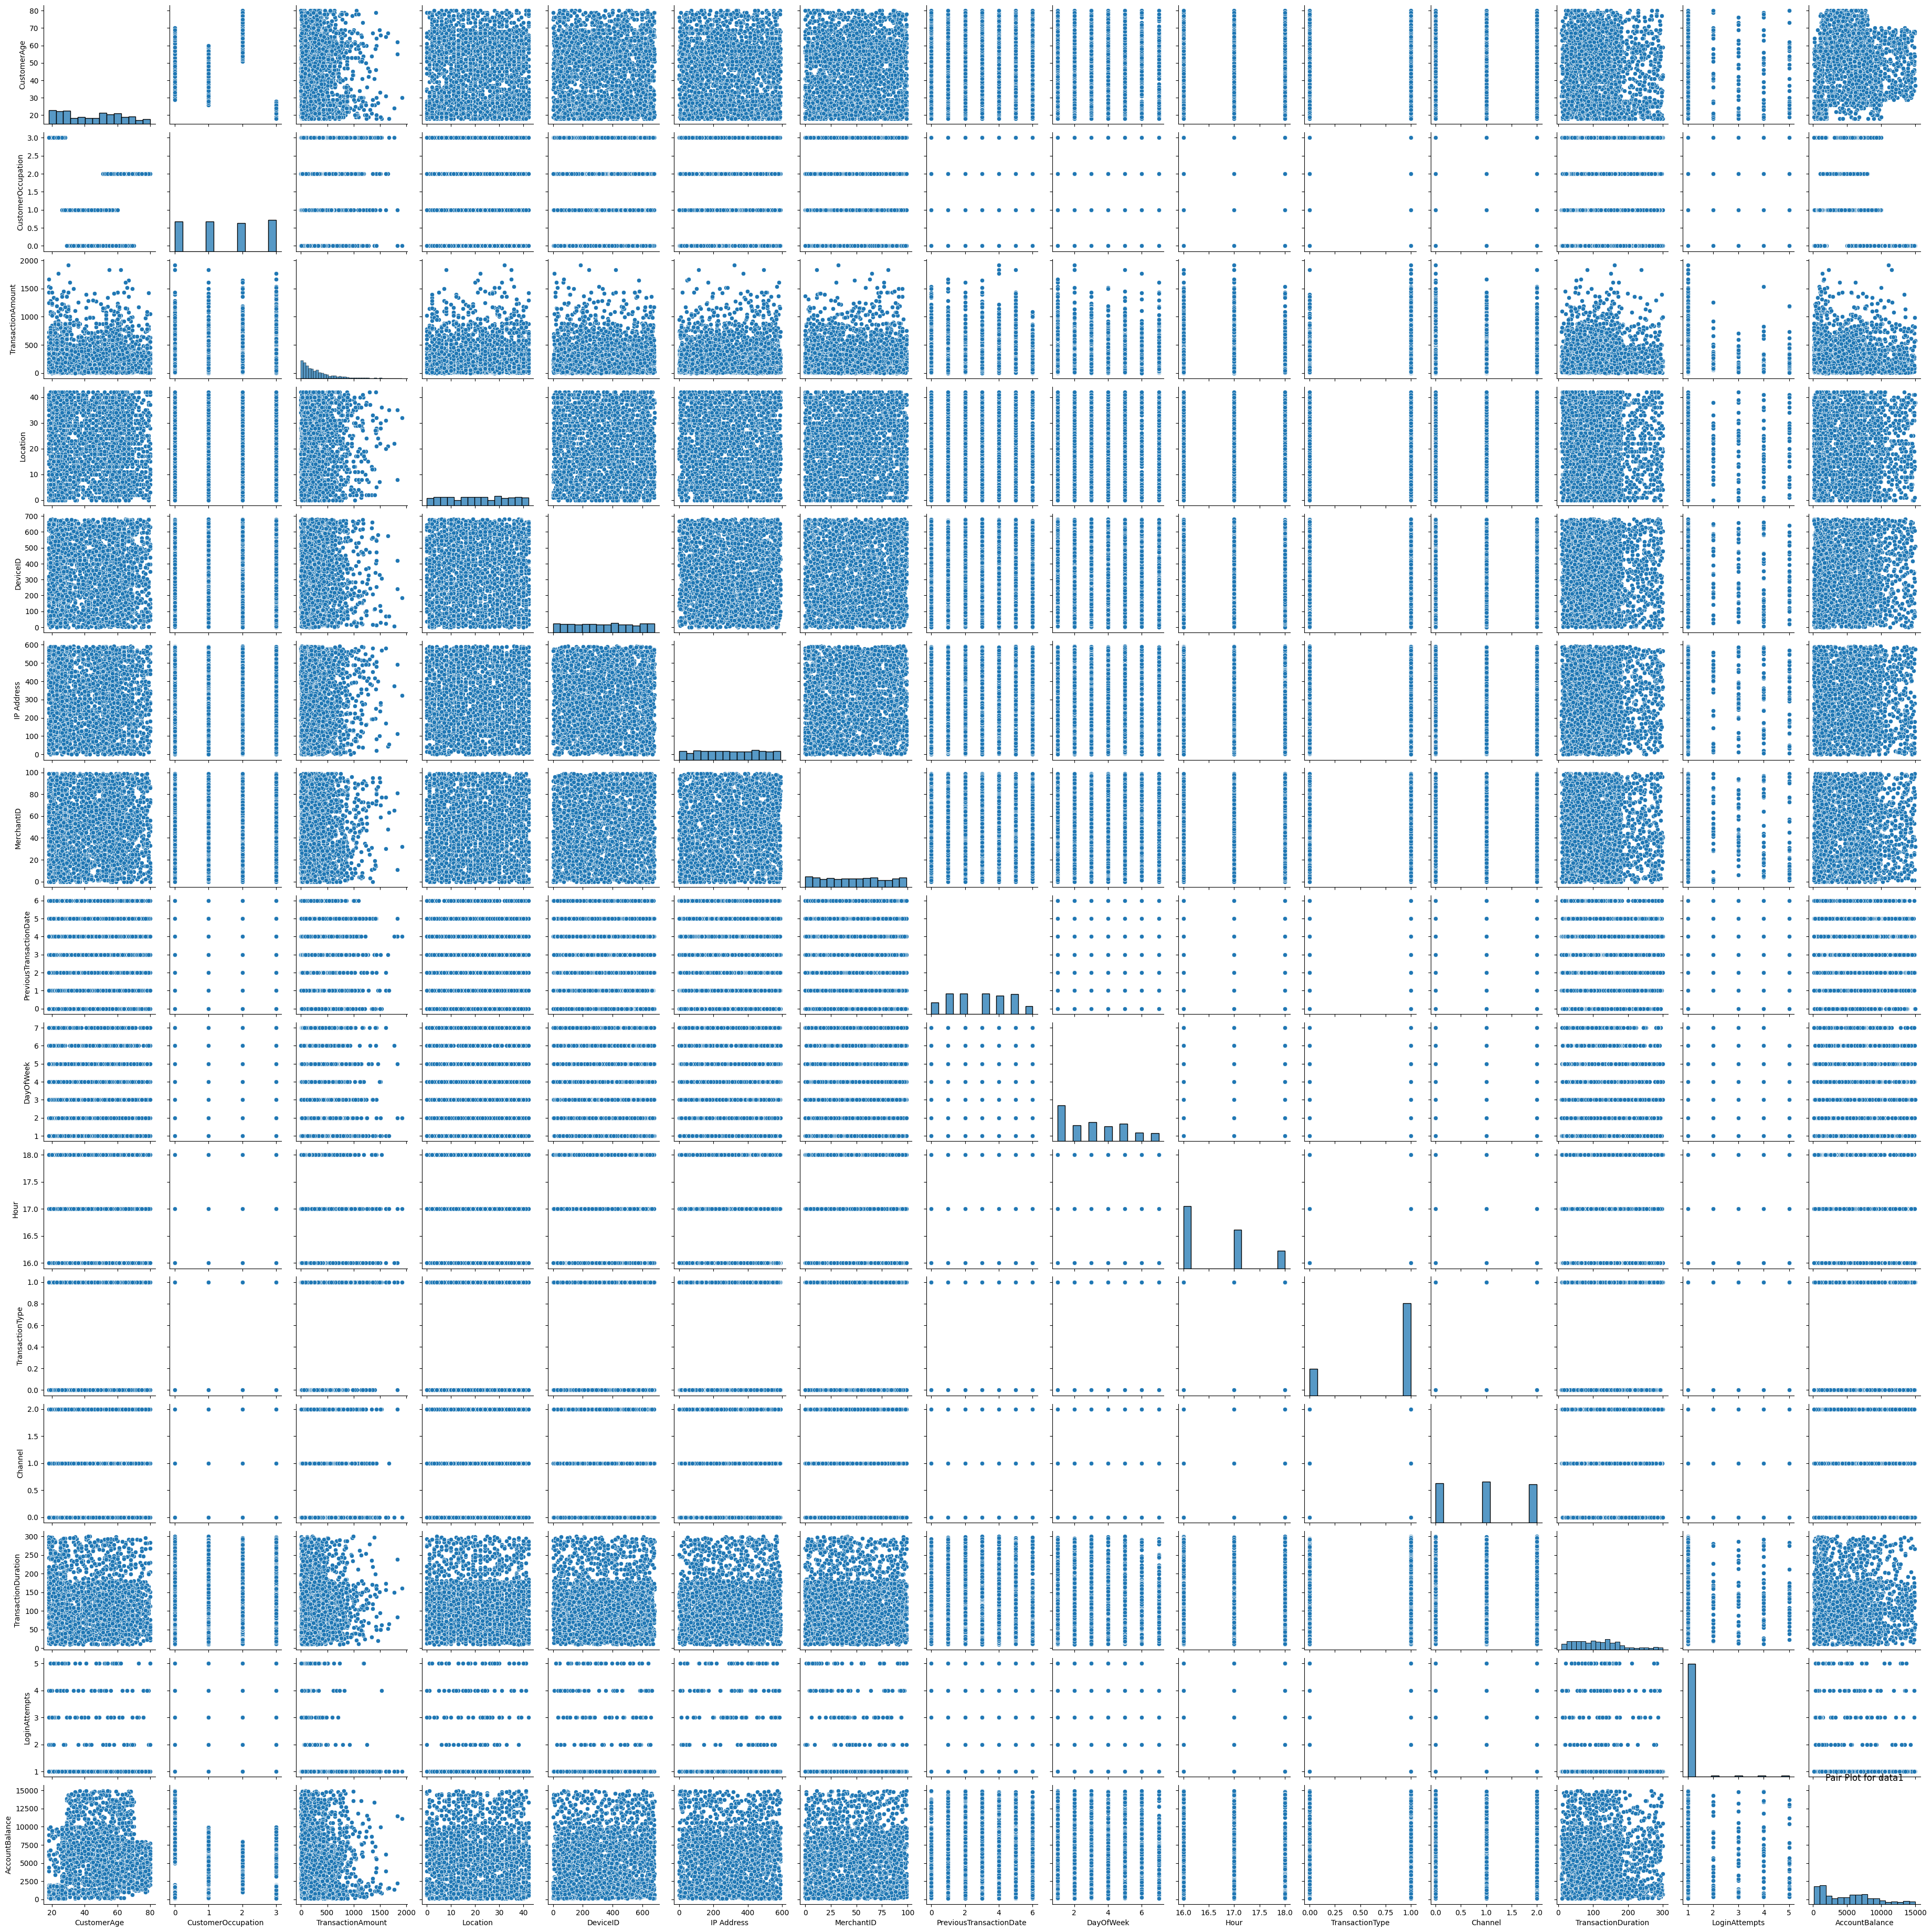

In [37]:
plt.figure(figsize=(20,16))
sns.pairplot(data1)
plt.title('Pair Plot for data1')
plt.show()

In [38]:
data1.head()

CustomerAge  CustomerOccupation  TransactionAmount  Location  DeviceID  \
0           70                   0              14.09        36       365   
1           68                   0             376.24        15        50   
2           19                   3             126.29        23       229   
3           26                   3             184.50        33       182   
4           26                   3              13.45         1       298   

   IP Address  MerchantID  PreviousTransactionDate  DayOfWeek  Hour  \
0         186          14                        2          6    16   
1          82          51                        3          2    16   
2         343           8                        1          6    18   
3         300           1                        3          5    16   
4         501          90                        0          1    17   

   TransactionType  Channel  TransactionDuration  LoginAttempts  \
0                1        0                   81              1   
1                1        0                  141              1   
2                1        2                   56              1   
3                1        2                   25              1   
4                0        2                  198              1   

   AccountBalance  
0         5112.21  
1        13758.91  
2         1122.35  
3         8569.06  
4         7429.40

In [39]:
data1.columns

Index(['CustomerAge', 'CustomerOccupation', 'TransactionAmount', 'Location',
       'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate',
       'DayOfWeek', 'Hour', 'TransactionType', 'Channel',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance'],
      dtype='object')

**Standardizing the data**

In [40]:
# Define features to scale=The one that not encoded
features_to_scale = ['CustomerAge', 'TransactionAmount', 'DayOfWeek', 'Hour',
                     'TransactionDuration', 'LoginAttempts', 'AccountBalance']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling
data1[features_to_scale] = scaler.fit_transform(data1[features_to_scale])

C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\1652831008.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1[features_to_scale] = scaler.fit_transform(data1[features_to_scale])


In [41]:
# Print scaled data (optional)
data1.head()

CustomerAge  CustomerOccupation  TransactionAmount  Location  DeviceID  \
0     1.423718                   0          -0.971275        36       365   
1     1.311287                   0           0.269440        15        50   
2    -1.443277                   3          -0.586882        23       229   
3    -1.049768                   3          -0.387456        33       182   
4    -1.049768                   3          -0.973468         1       298   

   IP Address  MerchantID  PreviousTransactionDate  DayOfWeek      Hour  \
0         186          14                        2   1.476513 -0.856729   
1          82          51                        3  -0.600777 -0.856729   
2         343           8                        1   1.476513  1.879574   
3         300           1                        3   0.957190 -0.856729   
4         501          90                        0  -1.120099  0.511423   

   TransactionType  Channel  TransactionDuration  LoginAttempts  \
0                1        0            -0.552443      -0.206794   
1                1        0             0.305314      -0.206794   
2                1        2            -0.909842      -0.206794   
3                1        2            -1.353017      -0.206794   
4                0        2             1.120184      -0.206794   

   AccountBalance  
0       -0.000537  
1        2.216472  
2       -1.023534  
3        0.885797  
4        0.593589

**PCA (Dimensionality Reduction)**

In [42]:
# Choose number of components
pca = PCA(n_components=2)  # CAN BE CHANGED
pca_data = pca.fit_transform(data1)

# Convert PCA results into a DataFrame
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

# Add PCA components to the main dataset
data1 = pd.concat([data1, pca_df], axis=1)

# Print explained variance (to check how much info is retained)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.56953848 0.41591055]


**Kmeans clustering**

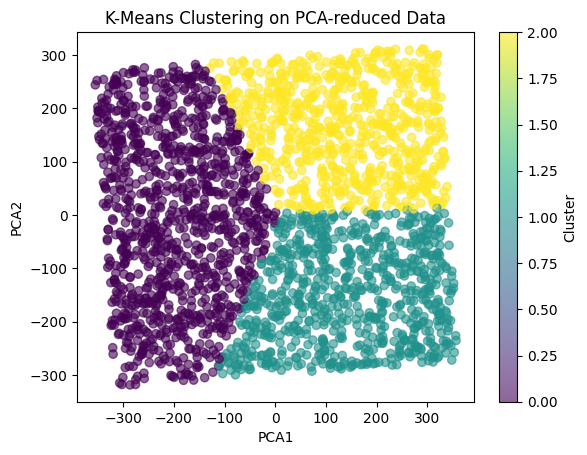

In [43]:
# Apply K-Means clustering (choose 3-5 clusters as a start)
kmeans = KMeans(n_clusters=3, random_state=42)
data1['KMeans_Cluster'] = kmeans.fit_predict(pca_df)


plt.scatter(data1['PCA1'],  # No need for iloc[:, 0]
            data1['PCA2'],  
            c=data1['KMeans_Cluster'], 
            cmap='viridis', 
            alpha=0.6)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("K-Means Clustering on PCA-reduced Data")
plt.colorbar(label="Cluster")
plt.show()

#plt.figure(figsize=(8, 6))
#plt.scatter(data1['PCA1'].iloc[:, 0], 
#            data1['PCA2'].iloc[:, 0], 
#            c=data1['Cluster'], 
#            cmap='viridis', 
#            alpha=0.6)
#plt.xlabel("PCA1")
#plt.ylabel("PCA2")
#plt.title("Clusters in PCA Space")
#plt.colorbar(label="Cluster")
#plt.show()

In [44]:
data1 = data1.loc[:, ~data1.columns.duplicated()]

In [45]:
data1['KMeans_Cluster'] = data1['KMeans_Cluster'].astype(int)

In [46]:
print("PCA1 shape:", data1['PCA1'].shape)
print("PCA2 shape:", data1['PCA2'].shape)
print("Cluster shape:", data1['KMeans_Cluster'].shape)

PCA1 shape: (2512,)
PCA2 shape: (2512,)
Cluster shape: (2512,)


In [47]:
print("pca_df shape:", pca_df.shape)
print("Unique cluster labels:", np.unique(data1['KMeans_Cluster']))

pca_df shape: (2512, 2)
Unique cluster labels: [0 1 2]


**DBSCAN (Density-Based Clustering)**

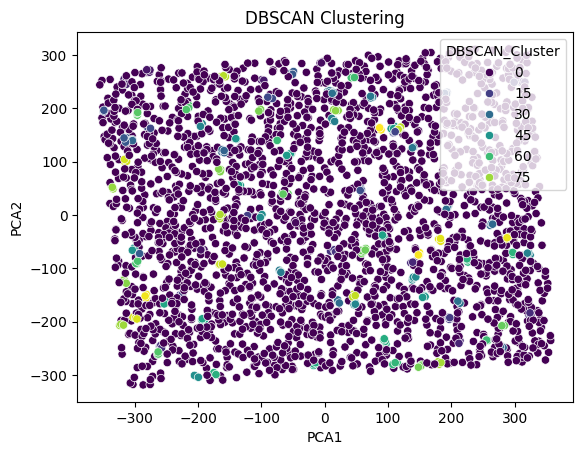

In [48]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=5, 
                min_samples=3)
data1['DBSCAN_Cluster'] = dbscan.fit_predict(data1[['PCA1', 'PCA2']])

# Visualizing Clusters
sns.scatterplot(x=data1['PCA1'], y=data1['PCA2'], hue=data1['DBSCAN_Cluster'], palette='viridis')
plt.title("DBSCAN Clustering")
plt.show()

**Hierarchical Clustering (Agglomerative)**

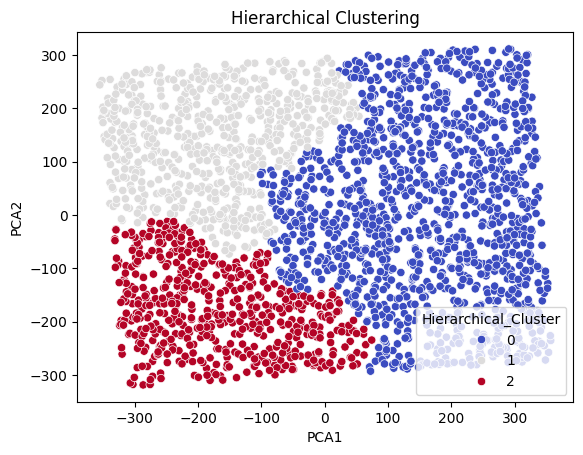

In [49]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical Clustering
agg_clust = AgglomerativeClustering(n_clusters=3, linkage='ward')  # Adjust clusters if needed
data1['Hierarchical_Cluster'] = agg_clust.fit_predict(data1[['PCA1', 'PCA2']])

# Visualizing
sns.scatterplot(x=data1['PCA1'], y=data1['PCA2'], hue=data1['Hierarchical_Cluster'], palette='coolwarm')
plt.title("Hierarchical Clustering")
plt.show()

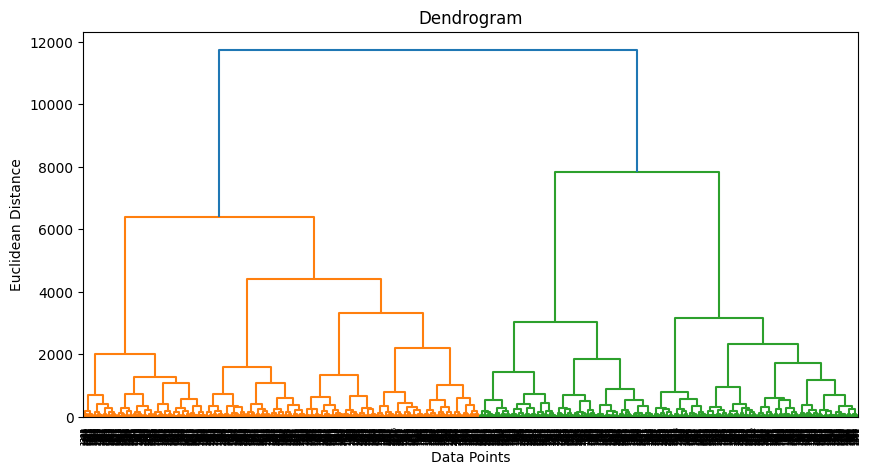

In [50]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
sch.dendrogram(sch.linkage(data1[['PCA1', 'PCA2']], method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

**Gaussian Mixture Models (GMM)**

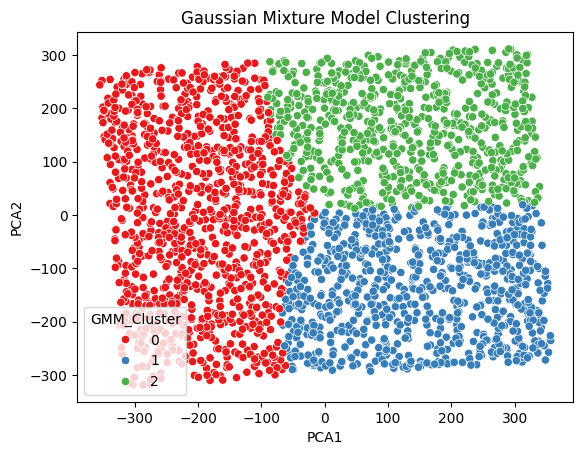

In [51]:
from sklearn.mixture import GaussianMixture

# GMM Clustering
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust n_components
data1['GMM_Cluster'] = gmm.fit_predict(data1[['PCA1', 'PCA2']])

# Visualizing
sns.scatterplot(x=data1['PCA1'], y=data1['PCA2'], hue=data1['GMM_Cluster'], palette='Set1')
plt.title("Gaussian Mixture Model Clustering")
plt.show()

**SILHOUETTE SCORES**

In [52]:
from sklearn.metrics import silhouette_score

# Evaluate K-Means
kmeans_score = silhouette_score(data1[['PCA1', 'PCA2']], data1['KMeans_Cluster'])

# Evaluate DBSCAN (ignoring noise points labeled as -1)
dbscan_labels = data1['DBSCAN_Cluster']
dbscan_filtered = data1[dbscan_labels != -1]
dbscan_score = silhouette_score(dbscan_filtered[['PCA1', 'PCA2']], dbscan_filtered['DBSCAN_Cluster'])

# Evaluate Hierarchical
hierarchical_score = silhouette_score(data1[['PCA1', 'PCA2']], data1['Hierarchical_Cluster'])

# Evaluate GMM
gmm_score = silhouette_score(data1[['PCA1', 'PCA2']], data1['GMM_Cluster'])

# Print Scores
print(f"Silhouette Score (K-Means): {kmeans_score:.4f}")
print(f"Silhouette Score (DBSCAN): {dbscan_score:.4f}")
print(f"Silhouette Score (Hierarchical): {hierarchical_score:.4f}")
print(f"Silhouette Score (GMM): {gmm_score:.4f}")


Silhouette Score (K-Means): 0.3850
Silhouette Score (DBSCAN): 0.8443
Silhouette Score (Hierarchical): 0.3551
Silhouette Score (GMM): 0.3813


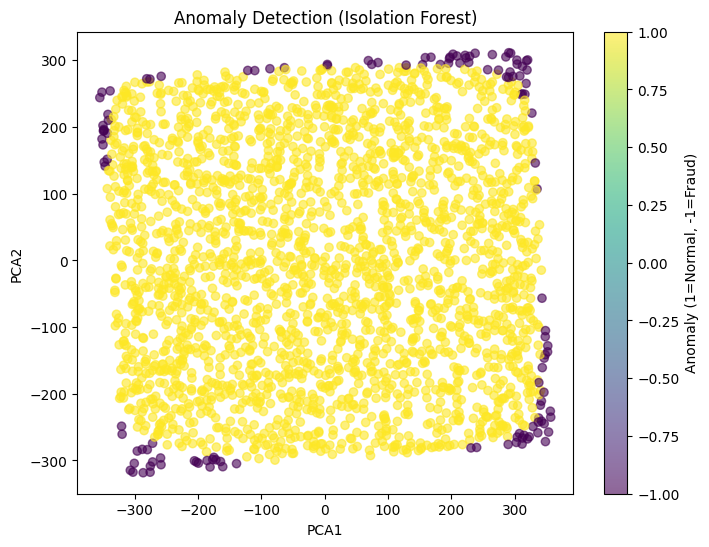

In [53]:
# Initialize Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42) 

# Fit and predict anomalies (-1 = anomaly, 1 = normal)
data1['Anomaly'] = iso_forest.fit_predict(pca_df)

# Visualize anomalies
plt.figure(figsize=(8, 6))
plt.scatter(data1['PCA1'],  # No need for iloc[:, 0]
            data1['PCA2'],  
            c=data1['Anomaly'], 
            cmap='viridis', 
            alpha=0.6)
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.title("Anomaly Detection (Isolation Forest)")
plt.colorbar(label="Anomaly (1=Normal, -1=Fraud)")
plt.show()


In [54]:
data1.head()

CustomerAge  CustomerOccupation  TransactionAmount  Location  DeviceID  \
0     1.423718                   0          -0.971275        36       365   
1     1.311287                   0           0.269440        15        50   
2    -1.443277                   3          -0.586882        23       229   
3    -1.049768                   3          -0.387456        33       182   
4    -1.049768                   3          -0.973468         1       298   

   IP Address  MerchantID  PreviousTransactionDate  DayOfWeek      Hour  \
0         186          14                        2   1.476513 -0.856729   
1          82          51                        3  -0.600777 -0.856729   
2         343           8                        1   1.476513  1.879574   
3         300           1                        3   0.957190 -0.856729   
4         501          90                        0  -1.120099  0.511423   

   TransactionType  Channel  TransactionDuration  LoginAttempts  \
0                1        0            -0.552443      -0.206794   
1                1        0             0.305314      -0.206794   
2                1        2            -0.909842      -0.206794   
3                1        2            -1.353017      -0.206794   
4                0        2             1.120184      -0.206794   

   AccountBalance        PCA1        PCA2  KMeans_Cluster  DBSCAN_Cluster  \
0       -0.000537   35.128486 -108.878877               1              -1   
1        2.216472 -271.570894 -235.147594               0              -1   
2       -1.023534 -111.757878   37.963296               0              -1   
3        0.885797 -155.569956   -8.299928               0              -1   
4        0.593589  -54.205379  200.586872               2              -1   

   Hierarchical_Cluster  GMM_Cluster  Anomaly  
0                     0            1        1  
1                     2            0        1  
2                     1            0        1  
3                     1            0        1  
4                     1            2        1

In [55]:
data1['Anomaly'].value_counts()
data1[data1['Anomaly'] == -1]
#Tune Parameters (Adjust contamination and n_clusters)

CustomerAge  CustomerOccupation  TransactionAmount  Location  DeviceID  \
18       0.805347                   2          -0.955550         0       513   
44      -0.993553                   3           0.023010        21       665   
55      -1.105984                   3           0.066314        23        12   
118     -1.049768                   1           0.377049         4       527   
128     -1.049768                   3          -0.888847        23       667   
...           ...                 ...                ...       ...       ...   
2452    -0.487612                   0          -0.790830         2       650   
2469    -1.162199                   3          -0.404175        40       487   
2479     0.299406                   1          -0.123828        28         4   
2483     0.411837                   1          -0.318491        19       679   
2487    -0.937337                   1          -0.834202         4        30   

      IP Address  MerchantID  PreviousTransactionDate  DayOfWeek      Hour  \
18           579          53                        6  -0.600777 -0.856729   
44           523           4                        3  -0.081454 -0.856729   
55           540          51                        3   1.476513  0.511423   
118          589          40                        0   0.957190 -0.856729   
128          524           4                        1   1.995835 -0.856729   
...          ...         ...                      ...        ...       ...   
2452         587           3                        4  -1.120099  1.879574   
2469         580          81                        5  -0.081454 -0.856729   
2479         518          70                        3   0.957190  0.511423   
2483         135          89                        3  -0.081454  0.511423   
2487          35          84                        0   0.957190  0.511423   

      TransactionType  Channel  TransactionDuration  LoginAttempts  \
18                  0        1            -0.195044      -0.206794   
44                  1        1            -1.238649      -0.206794   
55                  1        1            -0.523851      -0.206794   
118                 1        2            -0.824067      -0.206794   
128                 1        2            -0.166452      -0.206794   
...               ...      ...                  ...            ...   
2452                0        1            -1.081394      -0.206794   
2469                1        2            -0.009197      -0.206794   
2479                0        2            -0.338004      -0.206794   
2483                1        2            -0.395188      -0.206794   
2487                0        1            -1.467385      -0.206794   

      AccountBalance        PCA1        PCA2  KMeans_Cluster  DBSCAN_Cluster  \
18          0.726653  154.645059  293.749711               2              -1   
44         -1.088593  310.224650  248.737383               2               7   
55         -0.971824 -342.304781  218.954945               0              -1   
118         0.828769  167.883123  304.714400               2              -1   
128        -1.233441  312.145011  249.878809               2               7   
...              ...         ...         ...             ...             ...   
2452       -1.263942  290.703248  311.491484               2              -1   
2469       -1.206370  128.593267  292.926604               2              -1   
2479        0.415735 -348.707906  196.459926               0              22   
2483        1.047447  352.017855 -137.168350               1              -1   
2487       -1.070055 -288.130141 -283.425276               0              -1   

      Hierarchical_Cluster  GMM_Cluster  Anomaly  
18                       0            2       -1  
44                       0            2       -1  
55                       1            0       -1  
118                      0            2       -1  
128                      0            2       -1  


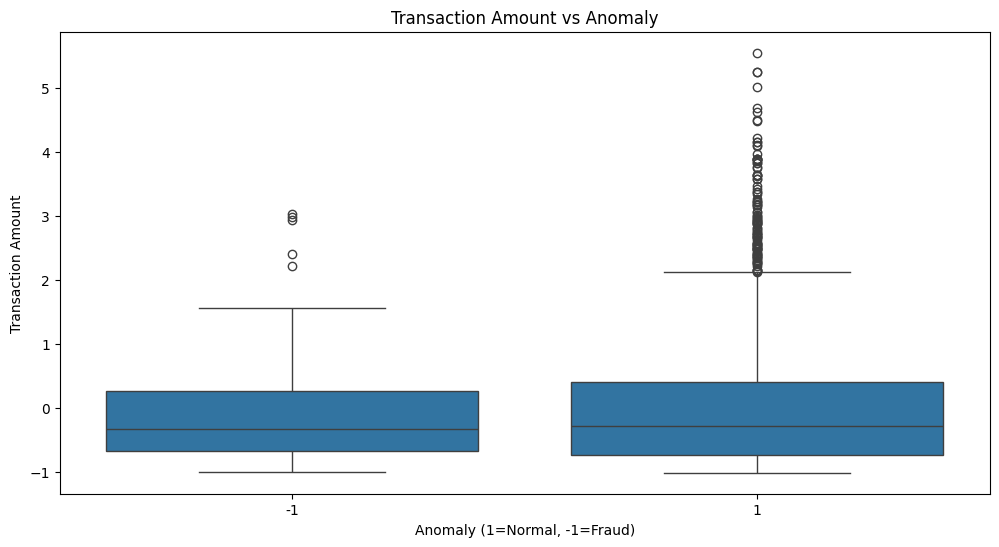

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=data1['Anomaly'], y=data1['TransactionAmount'])
plt.title("Transaction Amount vs Anomaly")
plt.xlabel("Anomaly (1=Normal, -1=Fraud)")
plt.ylabel("Transaction Amount")
plt.show()


C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\553022170.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[data1['Anomaly'] == 1]['TransactionAmount'], label="Normal", shade=True)
C:\Users\Alvin\AppData\Local\Temp\ipykernel_10696\553022170.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data1[data1['Anomaly'] == -1]['TransactionAmount'], label="Fraud", shade=True, color="red")


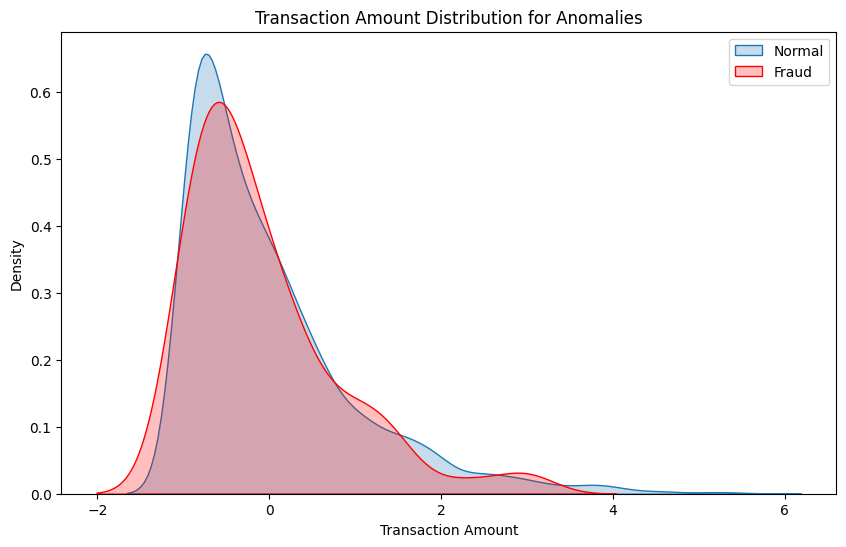

In [57]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data1[data1['Anomaly'] == 1]['TransactionAmount'], label="Normal", shade=True)
sns.kdeplot(data1[data1['Anomaly'] == -1]['TransactionAmount'], label="Fraud", shade=True, color="red")
plt.title("Transaction Amount Distribution for Anomalies")
plt.xlabel("Transaction Amount")
plt.legend()
plt.show()

In [58]:
data1 = data1.loc[:, ~data1.columns.duplicated()]

In [59]:
print(data1.columns)

Index(['CustomerAge', 'CustomerOccupation', 'TransactionAmount', 'Location',
       'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate',
       'DayOfWeek', 'Hour', 'TransactionType', 'Channel',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'PCA1',
       'PCA2', 'KMeans_Cluster', 'DBSCAN_Cluster', 'Hierarchical_Cluster',
       'GMM_Cluster', 'Anomaly'],
      dtype='object')


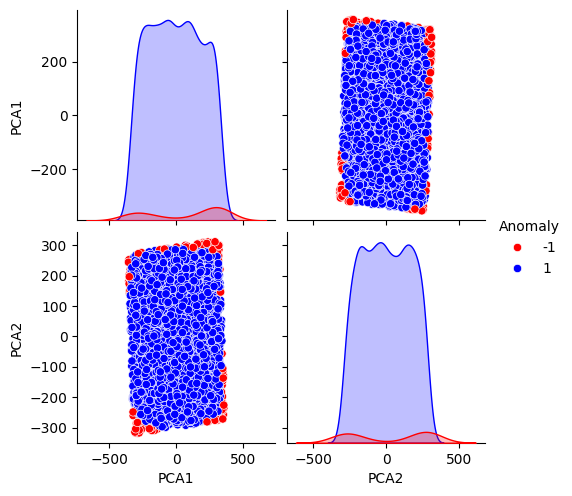

In [60]:
sns.pairplot(data1, 
             hue='Anomaly', 
             vars=['PCA1', 'PCA2'], 
             palette={1: 'blue', -1: 'red'})
plt.show()

**LOF-Local Outlier Factor**

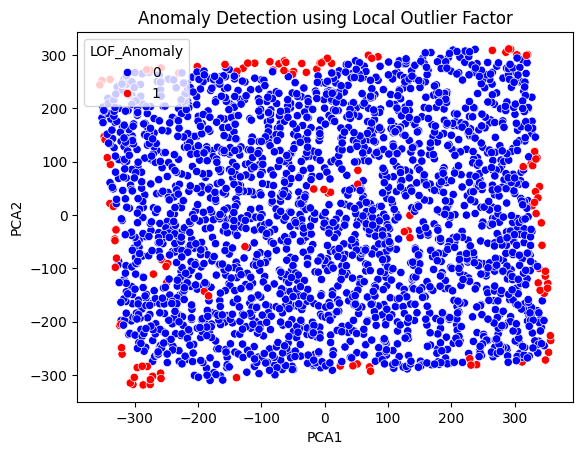

In [61]:
from sklearn.neighbors import LocalOutlierFactor

# Fit LOF
lof = LocalOutlierFactor(n_neighbors=20, 
                         contamination=0.05) #change to see perfomance
data1['LOF_Anomaly'] = lof.fit_predict(data1[['PCA1', 'PCA2']])

# Convert labels (-1 = anomaly, 1 = normal)
data1['LOF_Anomaly'] = data1['LOF_Anomaly'].map({1: 0, -1: 1})

# Visualize
sns.scatterplot(x=data1['PCA1'], y=data1['PCA2'], hue=data1['LOF_Anomaly'], palette={0: 'blue', 1: 'red'})
plt.title("Anomaly Detection using Local Outlier Factor")
plt.show()


**Comparing anomalies sum**

In [62]:
print(f"Total Anomalies (Isolation Forest): {data1['Anomaly'].sum()}")
print(f"Total Anomalies (LOF): {data1['LOF_Anomaly'].sum()}")

Total Anomalies (Isolation Forest): 2260
Total Anomalies (LOF): 126
